In [1]:
import pandas as pd
from pathlib import Path
import openpyxl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Using the path function from the pathlib library to read the excel files
#Loading the operating budget data into dataframes
budget_path_2019 = Path("Resources/approved-operating-budget-summary-2019.xlsx") #2019
budget2019_df = pd.read_excel(budget_path_2019, sheet_name='Open Data')
budget_path_2020 = Path("Resources/approved-operating-budget-summary-2020.xlsx") #2020
budget2020_df = pd.read_excel(budget_path_2020, sheet_name='Open Data')
budget_path_2021 = Path("Resources/approved-operating-budget-summary-2021.xlsx") #2021
budget2021_df = pd.read_excel(budget_path_2021, sheet_name='Open Data')
budget_path_2022 = Path("Resources/approved-operating-budget-summary-2022.xlsx") #2022
budget2022_df = pd.read_excel(budget_path_2022, sheet_name='Open Data')
budget_path_2023 = Path("Resources/approved-operating-budget-summary-2023.xlsx") #2023
budget2023_df = pd.read_excel(budget_path_2023, sheet_name='Open Data')
df_list = [budget2019_df,budget2020_df,budget2021_df,budget2022_df,budget2023_df]

In [87]:
#Changing the names of the excel sheet for consistency
#The sheets are already renamed, and is only done once permanently
#The old workseet title for workbook 2019 was '2019'
#The old workseet title for workbook 2021 was '2021'
workbook2019 = openpyxl.load_workbook(budget_path_2019) #opening the 2019 approved budget summary workbook
rename_2019_sheet = workbook2019['Open Data'] #selecting the excel sheet to rename
rename_2019_sheet.title = 'Open Data' #changing the title 
workbook2019.save(budget_path_2019)  #saving the modified file using the original file path
workbook2019.close()  #closing the workbook

In [46]:
workbook2021 = openpyxl.load_workbook(budget_path_2021) #opening the 2019 approved budget summary workbook
sheet_names = workbook2021.sheetnames # Get the sheet names of the workbook
if '2021' in sheet_names: # if '2021' is in the sheet names
    rename_2021_sheet = workbook2021['Open Data']  # Selecting the Excel sheet to rename
    rename_2021_sheet.title = 'Open Data'  # Changing the title
    workbook2021.save(budget_path_2021) #Saving the modified excel sheet
workbook2021.close() # Closing the workbook

In [ ]:
#Checking for null values

In [86]:
null_counts_per_year = {} #Empty to dictionary to store the null count 
for i, df in enumerate(df_list):
    year = 2019 + i
    
    # Calculate null values and sum for each column
    null_values = df.isnull()
    null_per_column = null_values.sum()
    
    # Store the result in the dictionary
    null_counts_per_year[year] = null_per_column

# Print the results
for year, null_counts in null_counts_per_year.items():
    print(f"Null counts for {year}:")
    print(null_counts)
    print()

Null counts for 2019:
Program                 0
Service                 0
Activity                0
Expense/Revenue         0
Category Name           0
Sub-Category Name       0
Commitment item         0
Budgeted amount 2019    0
dtype: int64

Null counts for 2020:
Program                 0
Service                 0
Activity                0
Expense/Revenue         0
Category Name           0
Sub-Category Name       0
Commitment item         0
Budgeted amount 2020    0
dtype: int64

Null counts for 2021:
Program                 0
Service                 0
Activity                0
Expense/Revenue         0
Category Name           0
Sub-Category Name       0
Commitment item         0
Budgeted amount 2021    0
dtype: int64

Null counts for 2022:
Program                 0
Service                 0
Activity                0
Expense/Revenue         0
Category Name           0
Sub-Category Name       0
Commitment item         0
Budgeted amount 2022    0
dtype: int64

Null counts for 2023:
Pr

In [ ]:
#Renaming the last column of each dataset to "Budgeted amount {Year}" to ensure consistency and improving the readability 
#of the data

In [23]:
for i, df in enumerate(df_list):
    year = 2019 + i
    new_column_name = f'Budgeted amount {year}'
    df.rename(columns={year: new_column_name}, inplace=True)

In [ ]:
#Dropping duplicates

In [24]:
for year, df in zip(range(2019, 2024), df_list):
    budget_column = f'Budgeted amount {year}'  # Adjust the column name based on the year
    df[budget_column] = pd.to_numeric(df[budget_column], errors='coerce')
    df.drop_duplicates(subset=budget_column, inplace=True)  # Drop duplicates for the specific budgeted amount column

In [ ]:
#Changing the scientific notation to the power of 6 to keep a standardized format

In [25]:
format_sci_notation = lambda x: '{:.6e}'.format(float(x))
for df in df_list:
    for column in df.columns:
        if 'Budgeted amount' in column:
            df[column] = df[column].apply(format_sci_notation)

In [ ]:
#Seperating expenses and revenues into separate dataframes

In [27]:
budget2019_df_exp = budget2019_df[budget2019_df['Expense/Revenue']=='Expenses']
budget2020_df_exp = budget2020_df[budget2020_df['Expense/Revenue']=='Expenses']
budget2021_df_exp = budget2021_df[budget2021_df['Expense/Revenue']=='Expenses']
budget2022_df_exp = budget2022_df[budget2022_df['Expense/Revenue']=='Expenses']
budget2023_df_exp = budget2023_df[budget2023_df['Expense/Revenue']=='Expenses']

In [28]:
budget2019_df_rev = budget2019_df[budget2019_df['Expense/Revenue']=='Revenues']
budget2020_df_rev = budget2020_df[budget2020_df['Expense/Revenue']=='Revenues']
budget2021_df_rev = budget2021_df[budget2021_df['Expense/Revenue']=='Revenues']
budget2022_df_rev = budget2022_df[budget2022_df['Expense/Revenue']=='Revenues']
budget2023_df_rev = budget2023_df[budget2023_df['Expense/Revenue']=='Revenues']

In [ ]:
#Renaming the last column in each dataset to 'Budgeted Amount'

In [73]:
new_df = [] #Empty list to store the renamed dataframe
for i, df in enumerate(df_list):
    year = 2019 + i 
    old_column_name = f'Budgeted amount {year}' #Old column name
    modified_df = df.copy() #Create a copy of the DataFrame and rename the column
    modified_df.rename(columns={old_column_name: 'Budgeted amount'}, inplace=True)
    new_df.append(modified_df)  # Append the modified DataFrame to new_df

# Concatenate the DataFrames in the list into a single DataFrame
renamed_df = pd.concat(new_df, ignore_index=True)
renamed_df.loc[:,'Budgeted amount'] = pd.to_numeric(mod_df['Budgeted amount'], errors='coerce') #Changing data to numeric for calculations

In [74]:
renamed_expenses = renamed_df[renamed_df['Expense/Revenue']=='Expenses'] #Filtering dataframe for expenses
renamed_expenses

,Program,Service,Activity,Expense/Revenue,Category Name,Sub-Category Name,Commitment item,Budgeted amount
0,Affordable Housing Office,Housing Improvement Programs,Housing Improvement Programs,Expenses,Salaries And Benefits,Allowances,Benefits To Be Dist,1666.06
1,Affordable Housing Office,Housing Improvement Programs,Housing Improvement Programs,Expenses,Salaries And Benefits,Benefits,Comprehensive Med,29344.32
2,Affordable Housing Office,Housing Improvement Programs,Housing Improvement Programs,Expenses,Salaries And Benefits,Benefits,CPP,20187.41
3,Affordable Housing Office,Housing Improvement Programs,Housing Improvement Programs,Expenses,Salaries And Benefits,Benefits,Dental Plan,14737.61
4,Affordable Housing Office,Housing Improvement Programs,Housing Improvement Programs,Expenses,Salaries And Benefits,Benefits,EI,8721.89
...,...,...,...,...,...,...,...,...
75639,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Salaries,Permanent Salaries,Full Time - Regular Pay Sap,566544.00
75640,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Materials & Supplies,Energy,Hydro,84000.00
75641,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Materials & Supplies,Supplies,Miscellaneous Materials & Supplies,216250.00
75642,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Service And Rent,Services,Other Expenses,714500.00


In [76]:
#Outliers for expenses
all_outliers_exp = pd.DataFrame() #Creating an empty dataframe to store the outliers
lower_quartiles_exp = renamed_expenses.groupby('Category Name')['Budgeted amount'].transform(lambda x: x.quantile(0.25)) #Calculating the lower quantile
upper_quartiles_exp = renamed_expenses.groupby('Category Name')['Budgeted amount'].transform(lambda x: x.quantile(0.75)) #Calculating the upper quantile
iqr_exp = upper_quartiles_exp - lower_quartiles_exp #Calculating the interquantile range
lower_bound_exp = lower_quartiles_exp - 1.5 * iqr_exp #Calculating the lower bound by using the values from the lower quantiles to find the minimum threshold
upper_bound_exp = upper_quartiles_exp + 1.5 * iqr_exp  #Calculating the lower bound by using the values from the lower quantiles to find the minimum threshold
outliers_exp = renamed_expenses[(renamed_expenses['Budgeted amount'] < lower_bound_exp) | (renamed_expenses['Budgeted amount'] > upper_bound_exp)] #Identifing and filtering outliers in the 'Budgeted amount' column based on the calculated lower and upper bounds for expenses.
all_outliers_exp = pd.concat([all_outliers_exp, outliers_exp], ignore_index=True) #Combining identified outliers from each dataframe and create a final dataframe
# Display the result
all_outliers_exp.sort_values('Budgeted amount', ascending=False)

,Program,Service,Activity,Expense/Revenue,Category Name,Sub-Category Name,Commitment item,Budgeted amount
10499,Toronto Transit Commission - Conventional,Toronto Transit Commission - Conventional Service,Not assigned,Expenses,Salaries,Permanent Salaries,Full Time - Regular Pay Sap,1.189747e+09
6056,Toronto Transit Commission - Conventional,Toronto Transit Commission - Conventional Service,Not assigned,Expenses,Salaries,Permanent Salaries,Full Time Reg Py Sap,1.124730e+09
8237,Toronto Transit Commission - Conventional,Toronto Transit Commission - Conventional Service,Not assigned,Expenses,Salaries,Permanent Salaries,Full Time - Regular Pay Sap,1.121098e+09
4011,Toronto Transit Commission - Conventional,Toronto Transit Commission - Conventional Service,Toronto Transit Commission - Conventional Service,Expenses,Salaries And Benefits,Permanent Salaries,Full Time Reg Py Sap,1.120524e+09
3841,Toronto Police Service,Toronto Police Service,Toronto Police Service,Expenses,Salaries And Benefits,Permanent Salaries,Full Time Reg Py Sap,1.086197e+09
...,...,...,...,...,...,...,...,...
3672,Toronto Employment & Social Services,Financial Supports,Financial and employment benefits administration,Expenses,Other Expenditures,Contributions And Transfers,Income Credits,-4.400000e+07
7888,Toronto Employment & Social Services,Financial Supports,Financial and employment benefits administration,Expenses,Other Expenditures,Contributions And Transfers,Income Credits,-4.400000e+07
10157,Toronto Employment & Social Services,Financial Supports,Financial and employment benefits administration,Expenses,Other Expenditures,Contributions And Transfers,Income Credits,-4.400000e+07
5754,Toronto Employment & Social Services,Financial Supports,Financial and employment benefits administration,Expenses,Other Expenditures,Contributions And Transfers,Income Credits,-4.400000e+07


In [63]:
renamed_revenues = renamed_df[renamed_df['Expense/Revenue']=='Revenues'] #Filtering dataframe for revenues
renamed_revenues

,Program,Service,Activity,Expense/Revenue,Category Name,Sub-Category Name,Commitment item,Budgeted amount
44,Affordable Housing Office,Housing Improvement Programs,Housing Improvement Programs,Revenues,Provincial Subsidies,Provincial Subsidies,Prov Grants/Subs,-756159.2
45,Affordable Housing Office,Housing Improvement Programs,Housing Improvement Programs,Revenues,Contribution From Reserves/Reserve Funds,Contribution From Reserves/Reserve Funds,Cont From Res Fund,-166333.0
74,Affordable Housing Office,Housing Policy & Partnerships,Housing Policy & Partnerships,Revenues,Provincial Subsidies,Provincial Subsidies,Prov Grants/Subs,-759934.2
101,Affordable Housing Office,New Affordable Housing Development,New Affordable Housing Development,Revenues,Provincial Subsidies,Provincial Subsidies,Prov Grants/Subs,-756163.4
102,Affordable Housing Office,New Affordable Housing Development,New Affordable Housing Development,Revenues,Contribution From Reserves/Reserve Funds,Contribution From Reserves/Reserve Funds,Cont From Reserves,-7000000.0
...,...,...,...,...,...,...,...,...
75633,Transportation Services,Transportation Safety & Operations,Transportation Information & Monitoring Systems,Revenues,Transfers From Capital,Transfers From Capital,Transfers From Capital Fund,-1915437.0
75634,Transportation Services,Transportation Safety & Operations,Transportation Studies & Investigations,Revenues,Transfers From Capital,Transfers From Capital,Transfers From Capital Fund,-3106050.0
75644,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Revenues,Contribution From Reserves/Reserve Funds,Contribution From Reserves/Reserve Funds,Contributions From Reserves,-33519.0
75645,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Revenues,User Fees & Donations,User Fees,"Fees, Service Charges",-836250.0


In [75]:
#Outliers for revenues
all_outliers_rev = pd.DataFrame()
renamed_revenues.loc[:,'Budgeted amount'] = pd.to_numeric(renamed_revenues['Budgeted amount'], errors='coerce')
lower_quartiles_rev = renamed_revenues.groupby('Category Name')['Budgeted amount'].transform(lambda x: x.quantile(0.25))
upper_quartiles_rev = renamed_revenues.groupby('Category Name')['Budgeted amount'].transform(lambda x: x.quantile(0.75))
iqr_rev = upper_quartiles_rev - lower_quartiles_rev
lower_bound_rev = lower_quartiles_rev - 1.5 * iqr_rev
upper_bound_rev = upper_quartiles_rev + 1.5 * iqr_rev
outliers_rev = renamed_revenues[(renamed_revenues['Budgeted amount'] < lower_bound_rev) | (renamed_revenues['Budgeted amount'] > upper_bound_rev)]
all_outliers_rev = pd.concat([all_outliers_rev, outliers_rev], ignore_index=True)
all_outliers_rev.sort_values('Budgeted amount', ascending=False)

/var/folders/nh/7vhf8kmd3nbg3k0j8yf9t99r0000gn/T/ipykernel_50415/928587181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renamed_revenues.loc[:,'Budgeted amount'] = pd.to_numeric(renamed_revenues['Budgeted amount'], errors='coerce')


,Program,Service,Activity,Expense/Revenue,Category Name,Sub-Category Name,Commitment item,Budgeted amount
856,"Policy, Planning, Finance & Administration",Financial Management,Budget Planning & coordination,Revenues,Inter-Divisional Recoveries,Inter-Divisional Recoveries,IDR - Water Services,-8.830845e+05
118,Office of the Controller,PMM-Purchasing,PMM-Purchasing,Revenues,Inter-Divisional Recoveries,Inter-Divisional Recoveries,IDR-Water Ser,-8.840350e+05
286,Office of the Controller,"RS-Tax, Utility & Parking Ticket Client Services",RS-Revenue Services Counter Operations,Revenues,Inter-Divisional Recoveries,Inter-Divisional Recoveries,IDR-Water Ser,-8.856721e+05
633,Office of the Controller,RS-Utility Billing,RS-Water Billings,Revenues,Inter-Divisional Recoveries,Inter-Divisional Recoveries,IDR - Water Services,-8.866255e+05
127,Office of the Controller,RS-Utility Billing,RS-Water Billings,Revenues,Inter-Divisional Recoveries,Inter-Divisional Recoveries,IDR-Solid Waste,-8.879708e+05
...,...,...,...,...,...,...,...,...
192,Non-Program Taxation Tax Levy,Corporate Accounts,Corporate Accounts,Revenues,Sundry and Other Revenues,Taxation,Tax Levy,-4.397556e+09
283,Non-Program Taxation Tax Levy,Corporate Accounts,Corporate Accounts,Revenues,Sundry and Other Revenues,Taxation,Tax Levy,-4.556628e+09
452,Non-Program Taxation Tax Levy,Corporate Accounts,Not assigned,Revenues,Other Revenue,Taxation,Tax Levy,-4.671171e+09
627,Non-Program Taxation Tax Levy,Corporate Accounts,Not assigned,Revenues,Other Revenue,Taxation,Tax Levy,-4.878800e+09


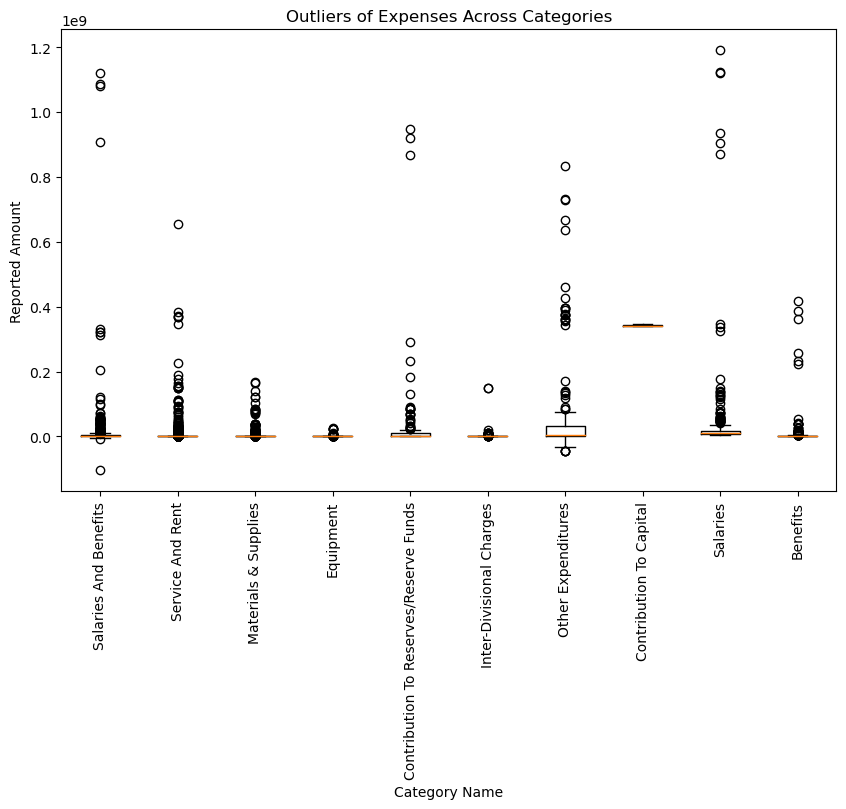

In [62]:
plt.figure(figsize=(10, 6))  #Setting the figure size
# Creating a box plot
plt.boxplot([all_outliers_exp[all_outliers_exp['Category Name'] == category]['Budgeted amount'] for category in all_outliers_exp['Category Name'].unique()])
plt.title('Outliers of Expenses Across Categories') # Setting plot title and labels
plt.xlabel('Category Name')
plt.ylabel('Reported Amount')
#Set x-axis ticks with labels for each unique category in the dataframe, rotated by 90 degrees.
plt.xticks(range(1, len(all_outliers_exp['Category Name'].unique()) + 1), all_outliers_exp['Category Name'].unique(), rotation=90)
plt.show()

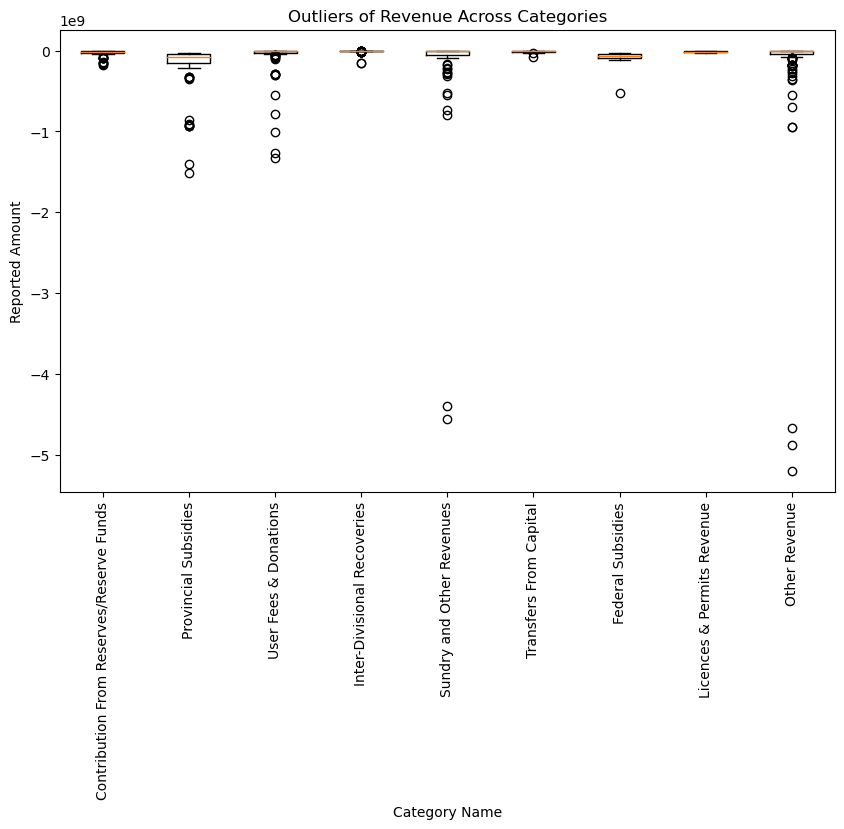

In [65]:
plt.figure(figsize=(10, 6)) #Setting the figure size
# Creating a box plot
plt.boxplot([all_outliers_rev[all_outliers_rev['Category Name'] == category_rev]['Budgeted amount'] for category_rev in all_outliers_rev['Category Name'].unique()])
plt.title('Outliers of Revenue Across Categories') # Setting plot title and labels
plt.xlabel('Category Name')
plt.ylabel('Reported Amount')
#Set x-axis ticks with labels for each unique category in the dataframe, rotated by 90 degrees.
plt.xticks(range(1, len(all_outliers_rev['Category Name'].unique()) + 1), all_outliers_rev['Category Name'].unique(), rotation=90)
plt.show()

In [66]:
renamed_expenses['Program'].unique()

array(['Affordable Housing Office', "Children's Services",
       'Court Services', 'Economic Development & Culture',
       'Long-Term Care Homes & Services', 'Parks, Forestry & Recreation',
       'Shelter, Support & Housing Administration',
       'Social Development, Finance & Administration',
       'Toronto Employment & Social Services',
       'Toronto Paramedic Services', 'City Planning',
       'Engineering & Construction Services', 'Fire Services',
       'Municipal Licensing & Standards',
       'Policy, Planning, Finance & Administration', 'Toronto Building',
       'Transportation Services', '311 Toronto',
       'Facilities, Real Estate, Environment & Energy', 'Fleet Services',
       'Information & Technology',
       'Office of the Chief Financial Officer',
       'Office of the Controller', "City Manager's Office",
       "City Clerk's Office", 'City Council', 'Legal Services',
       "Mayor's Office", "Auditor General's Office",
       "Integrity Commissioner's Office

In [80]:
sum_by_program = renamed_expenses.groupby('Program')['Budgeted amount'].sum()
program_expenditure_df = pd.DataFrame(sum_by_program)
program_expenditure_df.sort_values('Budgeted amount', ascending=False)

,Budgeted amount
Program,
Toronto Transit Commission - Conventional,1.026424e+10
Toronto Police Service,6.207482e+09
Toronto Employment & Social Services,5.707142e+09
Capital & Corporate Financing,5.426121e+09
Toronto Water,5.008522e+09
...,...
Office of the Ombudsman,1.256259e+07
Affordable Housing Office,1.104880e+07
Office of the Lobbyist Registrar,6.162638e+06


In [81]:
s_array = program_expenditure_df['Budgeted amount'].to_numpy()
sorted_array = np.sort(s_array)
print(sorted_array)

[2.92016044e+06 5.86537120e+06 6.16263823e+06 1.10487965e+07
 1.25625886e+07 1.30983626e+07 1.43040133e+07 1.55129006e+07
 1.81323999e+07 3.18850000e+07 3.29987894e+07 3.42540048e+07
 3.46876904e+07 3.56471859e+07 3.71783091e+07 3.75229570e+07
 4.61919044e+07 4.96518568e+07 5.15201748e+07 7.49806952e+07
 9.24448890e+07 9.31067669e+07 9.66977142e+07 1.11072176e+08
 1.13617593e+08 1.28632764e+08 1.33010027e+08 1.89103997e+08
 2.05126379e+08 2.64062059e+08 2.67825215e+08 2.69089769e+08
 2.77358719e+08 2.82003006e+08 3.13280002e+08 3.16148884e+08
 3.23501270e+08 3.23844609e+08 3.54447105e+08 3.73664818e+08
 4.28830072e+08 4.30136324e+08 4.55402517e+08 5.53365056e+08
 6.57228878e+08 6.99069364e+08 8.05002775e+08 8.74075410e+08
 9.24805100e+08 1.10550237e+09 1.26037476e+09 1.35586434e+09
 1.54707297e+09 1.59844823e+09 1.93673869e+09 2.05028881e+09
 2.35937887e+09 2.54799261e+09 3.17293655e+09 3.71956938e+09
 4.57813308e+09 5.00852151e+09 5.42612121e+09 5.70714214e+09
 6.20748203e+09 1.026423